# **Analisis Prediktif**: Prediksi Data Air yang Dapat Dikonsumsi Manusia
---
##### Oleh : [Fahmi Jabbar](https://www.dicoding.com/users/fahmijabbar)
##### Proyek Submission 1 - Machine Learning Terapan Dicoding

![Sumber : https://www.un.org/sustainabledevelopment/wp-content/uploads/2019/07/E_Infographic_06.pdf](https://user-images.githubusercontent.com/58651943/133801531-33e0b221-e741-406b-97f5-cbf455ad4bd1.png)









# **Pendahuluan**

Pada proyek ini, topik yang dibahas adalah mengenai `kesehatan` yang di buat untuk memprediksi data air yang dapat dikonsumsi manusia. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding. Untuk memudahkan navigasi di halaman, silahkan gunakan menu `Table of Contents` di kiri atas halaman.

# **1. Mengimpor pustaka/modul python yang dibutuhkan**

In [ ]:
# Memasang modul plotly & scikit-learn terbaru
!pip install -U plotly
!pip install -U scikit-learn

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 22.3 MB 57.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# Untuk pengolahan data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 

# Untuk visualisasi data
import plotly.express as px
import missingno as msno

# Untuk pembuatan model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold


# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

# **2. Mempersiapkan Dataset**

## 2.1 Menyiapkan kredensial akun Kaggle

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

## 2.2 Mengunduh dan Menyiapkan Dataset

![Sampul Dataset](https://user-images.githubusercontent.com/58651943/133802226-a7f08f75-0cf0-4b6b-8384-678cf09b15dd.png)

Informasi Dataset :

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Water Quality](https://www.kaggle.com/adityakadiwal/water-potability)
Lisensi | CC0: Public Domain
Kategori | Lingkungan, Bumi dan Alam, Kesehatan Publik
Rating Penggunaan | 10.0 (Gold)
Jenis dan Ukuran Berkas | CSV (525 kb)

In [ ]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download -dadityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 36.7MB/s]


In [ ]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/water-potability.zip

Archive:  /content/water-potability.zip
  inflating: water_potability.csv    


# **3. Pemahaman Data** ***(Data Understanding)***

## 3.1 Memuat Data pada sebuah Dataframe menggunakan *pandas*

In [ ]:
df = pd.read_csv("/content/water_potability.csv")

## 3.2 Keterangan kolom pada dataset

In [ ]:
# Memuat informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Berkas `water_potability.csv` berisi informasi metriks kualitas air untuk 3276 jenis air yang berbeda. Terdapat 9 buah data numerik (tipe data float64) dan 1 buah data kategori (tipe data int64). Terdapat juga beberapa kolom yang memiliki data kosong diantaranya pada kolom `pH`, `Sulfate` dan `Trihalomethanes`
</details>

In [ ]:
# Memuat deskripsi setiap kolom dataframe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Berkas `water_potability.csv` memiliki 10 kolom diantaranya :

1. `pH` Parameter penting dalam mengevaluasi keseimbangan asam-basa air. Pada data ini nilainya berada pada rentang 0-14. Tingkat pH untuk air yang dapat dikonsumsi menurut rekomendasi WHO adalah 6.5 - 8.5

2. `Hardness` Kesadahan air/Air keras didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium. Pada kolom ini kapasitas air untuk mengendapkan sabun ditulis dalam satuan mg/L

3. `Solids` Kemampuan air untuk melarutkan berbagai mineral atau garam organik dan anorganik, ditulis dalam satuan ppm. Untuk keperluan air minum batasnya adalah antara 500-1000 mg/L

4. `Chloramines` Kandungan Klorin/kloramin yang merupakan disinfektan utama yang digunakan dalam sistem air publik, ditulis dalam satuan ppm. Kadar klorin yang baik untuk air minum adalah kurang dari 4 ppm

5. `Sulfate` Kandungan sulfat yang merupakan zat alami yang ditemukan di mineral, tanah, dan batuan. Data ini ditulis dalam satuan mg/L. Kadar sulfat yang ada pada air bersih berkisar antara 3-30 mg/L

6. `Conductivity` Kemampuan air dalam menghantarkan listrik, yang ditulis dalam satuan μS/cm. Pada air minum, nilai konduktivitas air harus berada dibawah 400 μS/cm

7. `Organic_carbon` Kandungan karbon dalam senyawa organik, ditulis dalam satuan ppm. Menurut US EPA kandungan yang kurang dari 2 mg/L dapat digunakan sebagai air olahan/minum

8. `Trihalomethanes` Kandungan Trihalomethanes (THM) yang biasa ditemukan pada air yang diolah dengan klorin. Kadar THM hingga 80 ppm dianggap aman untuk digunakan sebagai air minum

9. `Turbidity` Tingkat kekeruhan air yang diukur dengan tingkat pancaran cahaya pada air dalam satuan NTU. Tingkat kekeruhan kurang dari 5.00 NTU dapat digunakan sebagai air minum menurut WHO

10. `Potability` Menentukan apakah air dapat diminum (nilai 1) atau tidak dapat diminum (nilai 0)
</details>

## 3.3 Visualisasi Data

In [ ]:
# Fungsi untuk plot distribusi data pada suatu kolom
def plot_distribution(column:str, title:str):
  figures = px.histogram(data_frame=df,
                        x=column,
                        color='Potability',
                        template='plotly_white',
                        marginal='box',
                        nbins=200,
                        color_discrete_sequence=["#FF7171","#9FD8DF"],
                        barmode='stack',
                        histfunc='count')

  figures.update_layout(font_family='Open Sans',
                        title=dict(text=title,
                                  x=0.47,
                                  font=dict(color="#333",size=20)),
                        hoverlabel=dict(bgcolor='white'))

  figures.show()

#### 3.3.1 Visualisasi data yang kosong

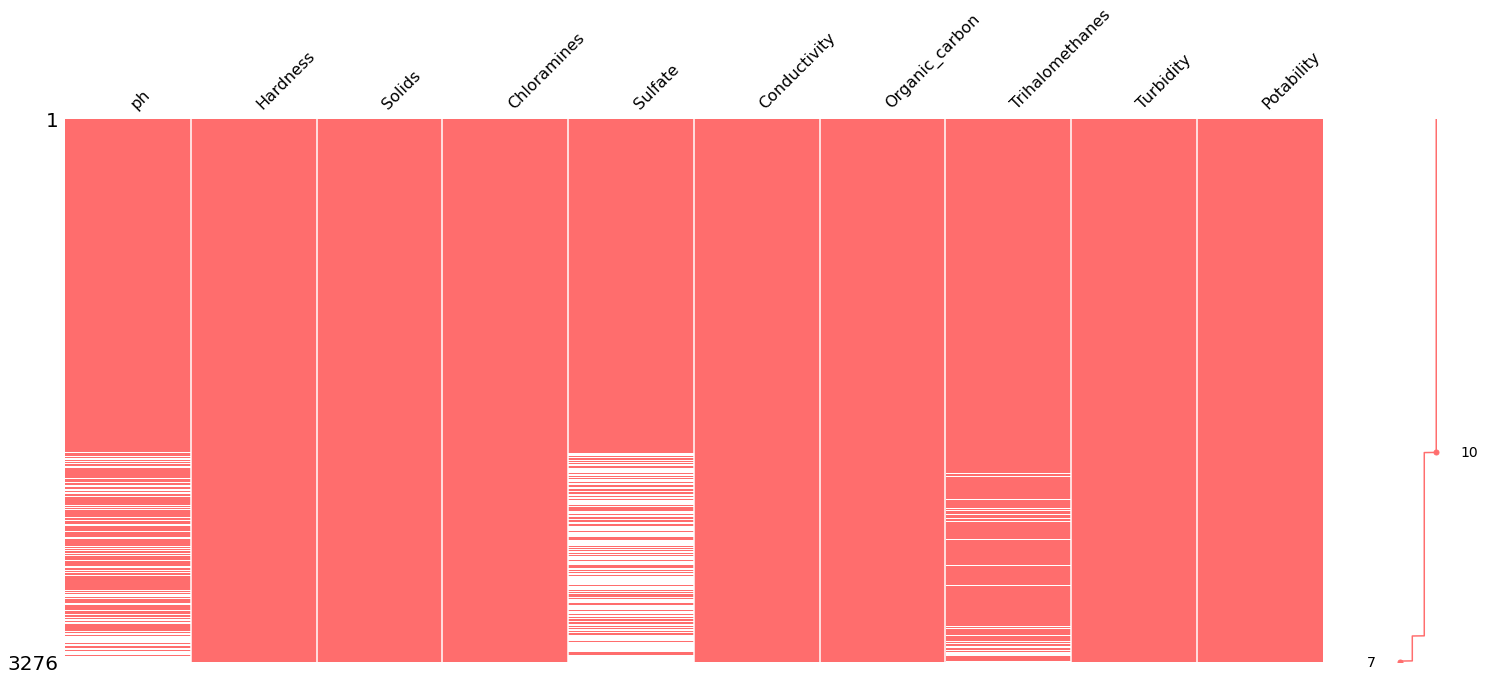

In [ ]:
# Melakukan visualisasi data yang kosong
sorted_null = msno.nullity_sort(df, sort='descending') 
figures = msno.matrix(sorted_null, color=(1, 0.43, 0.43))

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Berdasarkan visualisasi data diatas, dapat kita lihat bahwa terdapat data yang kosong pada kolom-kolom yang ada saat menjalankan kode <code>df.isna().sum()</code>
</details>

#### 3.3.2 Distribusi data pada kolom dengan fitur numerik (pH, Hardness	Solids, Chloramines, Sulfate, Conductivity, Organic_carbon	Trihalomethanes, dan Turbidity)

In [ ]:
# Melakukan visualisasi data pada setiap kolom dengan fitur numerik
for column in df.columns:
  if(column == 'Potability'):
    break
  plot_distribution(column=column, title=f"Distribusi fitur numerik pada kolom {column}")

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil visualisasi data diatas, kita dapat melihat distribusi data yang ada pada setiap kolom. Termasuk nilai minimum, median, maksimum, Q1, Q3, batas atas dan batas bawah. Selain itu kita juga dapat melihat beberapa nilai <i>outliers</i> atau data pencilan pada setiap kolomnya.
</details>

#### 3.3.3 Distribusi kelas pada kolom dengan fitur kategori (Potability)

In [ ]:
potability_data = pd.DataFrame(df['Potability'].value_counts())
figures = px.pie(data_frame=potability_data,
             values='Potability',
             names=['Not Potable','Potable'],
             hole=0.4,
             color_discrete_sequence=["#FF7171","#9FD8DF"],
             labels={'label':'Potability','Potability':'No. Of Samples'})

figures.update_layout(font_family='Open Sans',
                      title=dict(text='Distribusi kelas pada kolom potability',
                                 x=0.49,
                                 y=0.95,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.update_traces(textposition='outside', textinfo='percent+label')

figures.show()

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil visualisasi data diatas, kita dapat melihat persebaran data pada kategori Potability tidak seimbang atau disebut juga <i>data imbalance</i> 
</details>

#### 3.3.3 Korelasi data antar kolom dengan fitur numerik

In [ ]:
# Visualisasi matrix dari korelasi data
figures = px.scatter_matrix(data_frame=df, 
                            dimensions=df.drop('Potability',axis=1),
                            template='plotly_white',
                            color="Potability",
                            symbol="Potability",
                            color_discrete_sequence=["#FF7171","#9FD8DF"],
                            color_continuous_scale=["#FF7171","#9FD8DF"],
                            height=1500)

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Korelasi data antar kolom (fitur numerik) - Visualisasi Matrix',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False)

figures.update_traces(diagonal_visible=False)

figures.show()

In [ ]:
# Mempersiapkan dataframe korelasi data antar kolom
correlations_data=df.drop('Potability',axis=1).corr()
correlations_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


In [ ]:
# Visualisasi heatmap dari korelasi data
# semakin mendekati 1 semakin tinggi korelasi datanya
# semkain mendekati -1 semakin rendah korelasi datanya
figures = px.imshow(correlations_data,
                    color_continuous_scale=["#FF7171","#9FD8DF"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Korelasi data antar kolom (fitur numerik) - Visualisasi Heatmap',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.show()

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Apabila nilai korelasi (z) mendekati 1 maka korelasi data antar kolom termasuk tinggi dan baik untuk digunakan dalam fitur model klasifikasi. Namun dari hasil visualisasi diatas menunjukan bahwa semua kolom tidak memiliki korelasi yang tinggi antar sesama kolomnya.
</details>

# **4. Persiapan Data** ***(Data Preparation)***

## 4.1 Mengatasi masalah data yang kosong dengan nilai rata-rata kolom _(mean substitution)_

In [ ]:
# Rata-rata data pada kolom yang memiliki data kosong, dengan kondisi kolom Potability = 0
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [ ]:
# Rata-rata data pada kolom yang memiliki data kosong, dengan kondisi kolom Potability = 1
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [ ]:
# Rata-rata data pada kolom yang memiliki data kosong (data keseluruhan)
df[['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.080795
Sulfate            333.775777
Trihalomethanes     66.396293
dtype: float64

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Karena nilai rata-rata data kosong dengan kondisi kolom Potability 1 atau 0 memiliki rentang yang cukup jauh. Maka dipilih nilai rata-rata pada keseluruhan datanya.
</details>

In [ ]:
# Melakukan penggantian data kosong dengan nilai rata rata kolom 
# dan memasukkannya pada variabel df
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [ ]:
# Mengecek kembali nilai yang kosong pada dataset
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# Mengecek total baris dan kolom dari dataset
df.shape

(3276, 10)

Dengan demikian, data yang kosong sudah terisi dengan nilai rata-rata dari kolomnya

In [ ]:
# Mengecek total baris dan kolom dari dataset
df.shape

(3276, 10)

## 4.2 Mengatasi masalah data tidak seimbang dengan resample

In [ ]:
# Menghitung label dari kolom potability
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Karena data dengan label 1 (Potability) memiliki data yang lebih sedikit, maka label ini perlu dilakukan resample atau upsampling.
</details>

In [ ]:
# Memilih setiap labelnya
zero  = df[df['Potability']==0]
one = df[df['Potability']==1]

In [ ]:
# Melakukan resample sehingga banyak data pada label = 1
# adalah 1988
df_minority_resampled = resample(one, replace = True, n_samples = 1998) 

In [ ]:
# Memasukan datanya pada dataframe
df = pd.concat([zero, df_minority_resampled])

In [ ]:
# Menghitung label dari kolom potability
df.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

## 4.3 Melakukan pembagian data pada dataset dengan train_test_split

In [ ]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [ ]:
# Melakukan pembagian data dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404, stratify=y)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Pembagian dataset kepada 80% data latih dan 20% data uji + Memerhatikan pembagian data label (y) pada kedua data agar seimbang
</details>

In [ ]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(3196, 9)
(800, 9)


## 4.4 Mengatasi data pencilan pada data latih dengan metode LOF _(Local Outlier Factor)_

In [ ]:
# Inisialisasi fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)

In [ ]:
# Memilih semua baris yang bukan outlier
# Memasukannya kembali kedalam dataset
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
X_train.shape

(3167, 9)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Nilai pencilan merupakan nilai yang tidak normal pada dataset dan dapat mengakibatkan distorsi pada analisis statistika dan berujung pada pembuatan model yang kurang optimal. Maka dari itu, pada bagian ini diterapkan metode Local Outlier Factor untuk mendeteksi nilai outlier dan kemudian menghapusnya dari data latih. Mengapa data latih saja? Agar kita dapat melihat bagaimana performa model pada data yang belum pernah dilihat model sebelumnya.
</details>

## 4.5 Standarisasi nilai data pada fitur numerik dengan MinMaxScaler

In [ ]:
# Inisialisasi fungsi MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Melihat sampel hasil standarisasi data
print(f"{X_train[0:3]} \n")
print(X_test[0:3])

[[0.52108152 0.42719683 0.21962757 0.43333739 0.39583956 0.47169891
  0.60779579 0.59303686 0.68181207]
 [0.47563097 0.42712728 0.28625757 0.52597254 0.58097853 0.49286706
  0.55241582 0.55714076 0.4764115 ]
 [0.45920474 0.60307273 0.25996127 0.454127   0.50690402 0.55924574
  0.60595347 0.70115389 0.51707003]] 

[[0.6176715  0.39962606 0.37525008 0.51731834 0.59911574 0.43223464
  0.00340924 0.57332976 0.38978476]
 [0.59255035 0.55429405 0.42186761 0.56180315 0.646229   0.49422132
  0.56288265 0.55366689 0.58124364]
 [0.56401039 0.34078323 0.38329876 0.73277233 0.51757891 0.38427499
  0.53775492 0.66770749 0.54039181]]


<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dengan melakukan standarisasi data, kita telah membuat semua fitur numerik berada dalam skala data yang sama juga membuat komputasi dari pembuatan model dapat berjalan lebih cepat karena rentang datanya hanya antara 0-1.
</details>

In [ ]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(3167, 9)
(800, 9)


# **5. Pembuatan Model**

## 5.1 Model Baseline dengan Algoritma K-Nearest Neighbors

In [ ]:
# Pembuatan model baseline
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Pengujian model terhadap data test
y_pred = baseline_model.predict(X_test)

In [ ]:
# Laporan hasil klasifikasi model baseline
baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Potable',"Potable"])
pd.DataFrame(baseline_report).transpose()

,precision,recall,f1-score,support
Not Potable,0.693717,0.6625,0.677749,400.000
Potable,0.677033,0.7075,0.691932,400.000
accuracy,0.685000,0.6850,0.685000,0.685
macro avg,0.685375,0.6850,0.684840,800.000
weighted avg,0.685375,0.6850,0.684840,800.000


<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Model baseline yang dibuat memiliki akurasi yang kurang baik, begitu juga  nilai precision, recall dan f1-score pada setiap labelnya.
</details>

In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)

## 5.2 Pengembangan Model K-Nearest Neighbors dengan Hyper Parameter Tuning menggunakan HalvingGridSearchCV

In [ ]:
# Hyperparameter yang akan di tuning
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [ ]:
# Pencarian parameter terbaik dengan HalvingGridSearchCV
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=4, random_state=404, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='accuracy',
                                aggressive_elimination=True).fit(X_train, y_train)

In [ ]:
# Hasil hyperparameter tuning dengan skor terbaik yang di dapatkan
print(f"Best parameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best parameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1) with score 0.726561203054566


<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil diatas, dapat kita lihat bahwa dengan model KNN kita dapat membuat model yang memiliki akurasi yang lebih baik lagi setelah di atur hyperparameternya.
</details>

In [ ]:
# Penerapan hyperparameter pada model baseline
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)

In [ ]:
# Pengujian model terhadap data test
y_pred = model.predict(X_test)

In [ ]:
# Laporan hasil klasifikasi model baseline
improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Potable',"Potable"])
pd.DataFrame(improvement_report).transpose()

,precision,recall,f1-score,support
Not Potable,0.822715,0.74250,0.780552,400.00000
Potable,0.765376,0.84000,0.800954,400.00000
accuracy,0.791250,0.79125,0.791250,0.79125
macro avg,0.794045,0.79125,0.790753,800.00000
weighted avg,0.794045,0.79125,0.790753,800.00000


<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil diatas, model yang telah di atur hyperparameternya memiliki akurasi yang jauh lebih baik daripada sebelumnya. Begitupun nilai precision, recall dan f1-score pada setiap kelasnya.
</details>

In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
improvement_cf = confusion_matrix(y_test, y_pred)

# **6. Evaluasi Model**

## 6.1 Perbandingan metriks antara model baseline dengan model yang dikembangkan

In [ ]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['Not Potable']['f1-score'],improvement_report['Not Potable']['f1-score']],
                        'precision_0' : [baseline_report['Not Potable']['precision'],improvement_report['Not Potable']['precision']],
                        'recall_0' : [baseline_report['Not Potable']['recall'],improvement_report['Not Potable']['recall']],
                        'f1-score_1' : [baseline_report['Potable']['f1-score'],improvement_report['Potable']['f1-score']],
                        'precision_1' : [baseline_report['Potable']['precision'],improvement_report['Potable']['precision']],
                        'recall_1' : [baseline_report['Potable']['recall'],improvement_report['Potable']['recall']]},
                        index=['Model Baseline','Model yang Dikembangkan'])
multiheader = [('','accuracy'),
               ('Not Potable', 'f1-score'),
               ('Not Potable', 'precision'),
               ('Not Potable', 'recall'),
               ('Potable', 'f1-score'),
               ('Potable', 'precision'),
               ('Potable', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Not Potable  ...   Potable        
                        accuracy    f1-score  ... precision  recall
Model Baseline           0.68500    0.677749  ...  0.677033  0.7075
Model yang Dikembangkan  0.79125    0.780552  ...  0.765376  0.8400

[2 rows x 7 columns]

## 6.2 Confussion Matrix

In [ ]:
# Visualisasi hasil prediksi model baseline
figures = px.imshow(baseline_cf,
                    labels=dict(x="Label 1", y="Label 2", color="Terprediksi"),
                    x=['Not Potable', 'Potable'],
                    y=['Not Potable', 'Potable'],
                    color_continuous_scale=["#FF7171","#9FD8DF"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Confussion Matrix - Model Baseline',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False
                      )
figures.show()

In [ ]:
# Visualisasi hasil prediksi model yang dikembangkan
figures = px.imshow(improvement_cf,
                    labels=dict(x="Label 1", y="Label 2", color="Terprediksi"),
                    x=['Not Potable', 'Potable'],
                    y=['Not Potable', 'Potable'],
                    color_continuous_scale=["#FF7171","#9FD8DF"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Confussion Matrix - Model yang dikembangkan',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False)
figures.show()

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari kedua hasil visualisasi prediksi dengan confussion matrix diatas, kita dapat melihat bahwa performa model yang dikembangkan pada data uji lebih baik daripada model baselinenya dan dapat digunakan untuk memprediksi data. Dengan demikian, tujuan pembuatan model untuk menentukan apakah air layak untuk dikonsumsi oleh manusia bisa tercapai.
</details>

# Penutupan

Model untuk memprediksi data air yang layak di konsumsi oleh manusia telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan algoritma lainnya dalam membuat model seperti Random Forest, Decision Tree, Gradient Boosting dan masih banyak lagi.


### *Referensi*
- Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
- Dokumentasi Plotly : https://plotly.com/python/
- Lainnya :
  - https://www.kaggle.com/jaykumar1607/water-quality-analysis-plotly-and-modelling
  - https://www.kaggle.com/sohommajumder21/7-models-with-params-tuning-beginner-friendly
  - https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-76-accuracy
  - https://www.kaggle.com/gcmadhan/water-quality-prediction-76-h2o-80-accuracy